In [1]:
import pandas as pd
import matplotlib

In [2]:
carrier_df = pd.read_csv('INSURANCE_CARRIERNAMES.csv')

In [3]:
type(carrier_df)

pandas.core.frame.DataFrame

In [4]:
carrier_df['LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))
carrier_df['SUB_LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))

In [5]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH
0,1st community insurance services,32,32
1,360 coverage,12,12
2,360 coverage pro,16,16
3,360 coverage pros,17,17
4,360 coveragepros,16,16


In [6]:
carrier_df['PERCENT_LENGTH'] = carrier_df['LENGTH'].apply(lambda x: round(100*x/x))

In [7]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100


In [8]:
analysis = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
analysis_tail = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
carrier_df_tail = carrier_df.copy()

In [9]:
analysis

{'number_names': [371], 'avg_pct_len': [100]}

In [10]:
avg_pct_min = min(analysis['avg_pct_len'])
avg_pct_min_tail = min(analysis_tail['avg_pct_len'])
substring = 1
substring_tail = 1

In [11]:
while avg_pct_min >= 50:

    carrier_df['COMPANYNAME'] = carrier_df['COMPANYNAME'].apply(lambda x: x[(substring):])
    carrier_df['SUB_LENGTH'] = carrier_df['SUB_LENGTH'].apply(lambda x: (x-substring))
    carrier_df['PERCENT_LENGTH'] = 100*(carrier_df['SUB_LENGTH']/carrier_df['LENGTH'])
    analysis['number_names'].append(len(carrier_df['COMPANYNAME'].unique()))
    print(round(carrier_df['PERCENT_LENGTH'].mean()))
    analysis['avg_pct_len'].append(round(carrier_df['PERCENT_LENGTH'].mean()))
#     substring += 1
    avg_pct_min = carrier_df['PERCENT_LENGTH'].mean()


95.0
90.0
85.0
80.0
76.0
71.0
66.0
61.0
56.0
51.0
46.0


In [12]:
# carrier_df

In [13]:
analysis

{'number_names': [371, 371, 371, 366, 356, 350, 345, 330, 322, 316, 311, 303],
 'avg_pct_len': [100,
  95.0,
  90.0,
  85.0,
  80.0,
  76.0,
  71.0,
  66.0,
  61.0,
  56.0,
  51.0,
  46.0]}

In [14]:
analysis_df = pd.DataFrame(analysis)

In [15]:
analysis_df

,number_names,avg_pct_len
0,371,100.0
1,371,95.0
2,371,90.0
3,366,85.0
4,356,80.0
5,350,76.0
6,345,71.0
7,330,66.0
8,322,61.0
9,316,56.0


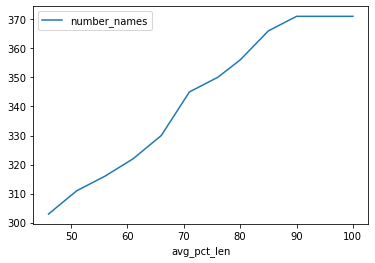

In [16]:
analysis_df.plot(x='avg_pct_len', y='number_names')

In [17]:
# while avg_pct_min_tail >= 50:

#     carrier_df_tail['COMPANYNAME'] = carrier_df_tail['COMPANYNAME'].apply(lambda x: x[:len(x)-(substring_tail)])
#     carrier_df_tail['SUB_LENGTH'] = carrier_df_tail['LENGTH'].apply(lambda x: (x-substring_tail))
#     carrier_df_tail['PERCENT_LENGTH'] = 100*(carrier_df_tail['SUB_LENGTH']/carrier_df_tail['LENGTH'])
#     analysis_tail['number_names'].append(len(carrier_df_tail['COMPANYNAME'].unique()))
#     print(carrier_df_tail['COMPANYNAME'].unique())
#     analysis_tail['avg_pct_len'].append(round(carrier_df_tail['PERCENT_LENGTH'].mean()))
#     substring_tail += 1
#     avg_pct_min_tail = min(analysis_tail['avg_pct_len'])


In [18]:
# analysis_df_tail = pd.DataFrame(analysis_tail)

In [19]:
# analysis_df_tail

In [20]:
# analysis_df_tail.plot(x='avg_pct_len', y='number_names')

In [21]:
carrier_df_tail

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100
...,...,...,...,...
366,world financial group,21,21,100
367,"world financial group, inc.",27,27,100
368,worldwide brokers and agents,28,28,100
369,xl specialty insurance co.,26,26,100


In [22]:
# Cartesian product function from a previous project
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

cctdf = cartesian_product_basic(carrier_df_tail, carrier_df_tail)
cctdf.head()


,COMPANYNAME_x,LENGTH_x,SUB_LENGTH_x,PERCENT_LENGTH_x,COMPANYNAME_y,LENGTH_y,SUB_LENGTH_y,PERCENT_LENGTH_y
0,1st community insurance services,32,32,100,1st community insurance services,32,32,100
1,1st community insurance services,32,32,100,360 coverage,12,12,100
2,1st community insurance services,32,32,100,360 coverage pro,16,16,100
3,1st community insurance services,32,32,100,360 coverage pros,17,17,100
4,1st community insurance services,32,32,100,360 coveragepros,16,16,100


In [23]:
cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
cctdf['STOP'] = cctdf['COMPANYNAME_x'] == cctdf['COMPANYNAME_y']
cctdf['EDIT_DISTANCE'] = 0
analysis_cctdf = {'number_names': [len(cctdf['CONCAT_COMPANYNAME'].unique())], 'avg_pct_len_x': [100], 'avg_pct_len_y': [100]}

In [24]:
import numpy as np

In [25]:
def subtract_substring(string, stop, sublength, substring = 1):
    string = np.where(stop == False, string[:len(string) - substring], string)
    return string

In [26]:
subtract_substring_v = np.vectorize(subtract_substring)

In [27]:
def substring(stop, sublength, substring = 1):
    sublength = np.where(stop == False, sublength-1, sublength)
    return sublength

In [28]:
substring_v = np.vectorize(substring)

In [29]:
def edit_length(edit_dist, x, y):
    edit_dist = np.where(x != y, edit_dist + 1, edit_dist)
    return edit_dist

In [30]:
edit_length_v = np.vectorize(edit_length)

In [31]:
def edit_stop(stop, x, y):
    stop = np.where(x == y, True, False) 
    return stop

In [32]:
edit_stop_v = np.vectorize(edit_stop)

In [33]:
SUB_LENGTH_y = np.array([row for row in cctdf['SUB_LENGTH_y']])
STOP = np.array([row for row in cctdf['STOP']])
COMPANYNAME_y = np.array([row for row in cctdf['COMPANYNAME_y']])
COMPANYNAME_x = np.array([row for row in cctdf['COMPANYNAME_x']])
EDIT_DISTANCE = np.array([row for row in cctdf['EDIT_DISTANCE']])

In [34]:
# cctdf['SUB_LENGTH_y'] = substring_v(STOP, SUB_LENGTH_y)
# cctdf['SUB_LENGTH_y']

In [35]:
# run same analysis as above but using a crossjoin instead
while avg_pct_min_tail >= 50:

    SUB_LENGTH_y = np.array([row for row in cctdf['SUB_LENGTH_y']])
    STOP = np.array([row for row in cctdf['STOP']])
    COMPANYNAME_y = np.array([row for row in cctdf['COMPANYNAME_y']])
    COMPANYNAME_x = np.array([row for row in cctdf['COMPANYNAME_x']])
    EDIT_DISTANCE = np.array([row for row in cctdf['EDIT_DISTANCE']])
#     cctdf['COMPANYNAME_x'] = cctdf['COMPANYNAME_x'].apply(lambda x: x[:len(x)-(substring_tail)])
#     cctdf['STOP'] = cctdf['COMPANYNAME_x'] == cctdf['COMPANYNAME_y']
    cctdf['COMPANYNAME_y'] = subtract_substring_v(COMPANYNAME_y, STOP, SUB_LENGTH_y)
    cctdf['SUB_LENGTH_y'] = substring_v(STOP, SUB_LENGTH_y)
#     cctdf['SUB_LENGTH_x'] = cctdf['SUB_LENGTH_x'].apply(lambda x: (x-substring_tail))
#     cctdf['SUB_LENGTH_y'] = cctdf['SUB_LENGTH_y'].apply(lambda x: (x-substring_tail))
    cctdf['PERCENT_LENGTH_x'] = 100*(cctdf['SUB_LENGTH_x']/cctdf['LENGTH_x'])
    cctdf['EDIT_DISTANCE'] = edit_length_v(EDIT_DISTANCE, COMPANYNAME_x, COMPANYNAME_y)
    cctdf['STOP'] = edit_stop_v(STOP, COMPANYNAME_x, COMPANYNAME_y)
    cctdf['PERCENT_LENGTH_y'] = 100*(cctdf['SUB_LENGTH_y']/cctdf['LENGTH_y'])
    cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
    analysis_cctdf['number_names'].append(len(cctdf['CONCAT_COMPANYNAME'].unique()))
    print(len(cctdf['CONCAT_COMPANYNAME'].unique()))
    analysis_cctdf['avg_pct_len_x'].append(round(cctdf['PERCENT_LENGTH_x'].mean()))
    analysis_cctdf['avg_pct_len_y'].append(round(cctdf['PERCENT_LENGTH_y'].mean()))
#     substring_tail += 1
    avg_pct_min_tail = round(cctdf['PERCENT_LENGTH_y'].mean())


137635
137640
136532
135051
132832
131353
129875
129504
129132
127654
126914


In [36]:
analysis_cctdf

{'number_names': [137641,
  137635,
  137640,
  136532,
  135051,
  132832,
  131353,
  129875,
  129504,
  129132,
  127654,
  126914],
 'avg_pct_len_x': [100,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 'avg_pct_len_y': [100,
  95.0,
  90.0,
  85.0,
  81.0,
  76.0,
  71.0,
  66.0,
  61.0,
  56.0,
  51.0,
  46.0]}

In [37]:
analysis_df_tail = pd.DataFrame(analysis_cctdf)
analysis_df_tail

,number_names,avg_pct_len_x,avg_pct_len_y
0,137641,100.0,100.0
1,137635,100.0,95.0
2,137640,100.0,90.0
3,136532,100.0,85.0
4,135051,100.0,81.0
5,132832,100.0,76.0
6,131353,100.0,71.0
7,129875,100.0,66.0
8,129504,100.0,61.0
9,129132,100.0,56.0


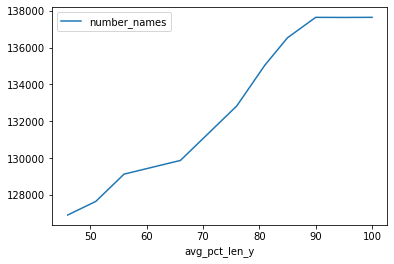

In [47]:
analysis_df_tail.plot(x='avg_pct_len_y', y='number_names')

In [39]:
# It looks to be approximately that the decision boundary is 70%
# I will calculate the actual decision boundary later
from approx_match_list import approx_match_list

In [40]:
name_list = pd.read_csv('INSURANCE_CARRIERNAMES.csv')
approx_match_names = approx_match_list(name_list['COMPANYNAME'].to_list(), 0.70)

In [41]:
approx_match_names

['1st community insurance services',
 '360 coverage',
 '360 coverage pro',
 '360 coverage pros',
 '360 coveragepros',
 '360 degree coverage pros',
 'Willis Fee',
 'aaa life insurance co.',
 'aaic',
 'abi administrative services',
 'accord insurance',
 'ace american insurance company',
 'ace financial group',
 'ace financial group ltd',
 'acord',
 'admiral indemnity company',
 'admiral insurance co',
 'admiral insurance company',
 'aeon risk services northeast, inc',
 'affinity insurance service',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'ajg gallager-affinity',
 'allen & associates',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus line

In [42]:
len(name_list['COMPANYNAME'].to_list())

371

In [43]:
len(approx_match_names)

369

In [44]:
split_names = [name.split() for name in approx_match_names]
empty_list = []
full_names = []

In [45]:
for name, split in zip(approx_match_names,split_names):
    if len(split) > 3 or len(split) == 1:
        full_names.append(name)
    else:
        empty_list.append(name)

In [46]:
full_names

['1st community insurance services',
 '360 degree coverage pros',
 'aaa life insurance co.',
 'aaic',
 'ace american insurance company',
 'ace financial group ltd',
 'acord',
 'aeon risk services northeast, inc',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus lines insurance company',
 'american administrative group (tpa)',
 'american alternative insurance company',
 'american alternative insurance corporation',
 'american auto ins company',
 'american automobile insurance company',
 'american capitol insurance co.',
 'american endurance specialty ins co',
 'american family home insurance compan